# Top 5 Tech Jobs in USA

## Objective
This notebook demonstrates **geographic filtering and comparative analysis** including:
- Country-level data filtering
- Top job role identification by volume
- Ranking and sorting techniques
- Regional market analysis
- Custom aggregations for business insights

These techniques are valuable for understanding regional job market dynamics and labor demand.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


In [3]:
df_us = df[df['job_country'] == 'United States'].copy()


In [4]:
df_us['job_posted_month'] = df_us['job_posted_date'].dt.strftime('%B')
df_pivot_table = df_us.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_pivot_table.reset_index(inplace=True)
df_pivot_table['month_num'] = pd.to_datetime(df_pivot_table['job_posted_month'], format='%B').dt.month
df_pivot_table.sort_values('month_num', inplace=True)
df_pivot_table.set_index('job_posted_month', inplace=True)
df_pivot_table.drop(columns='month_num', inplace=True)

In [5]:
df_us_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col = 'job_posted_month')
df_us_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [6]:
df_us_merged = df_pivot_table.merge(df_us_software_pivot, on = 'job_posted_month' )

In [7]:
top_5 = df_us_merged.sum().sort_values(ascending=False).head(5).index.tolist()
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

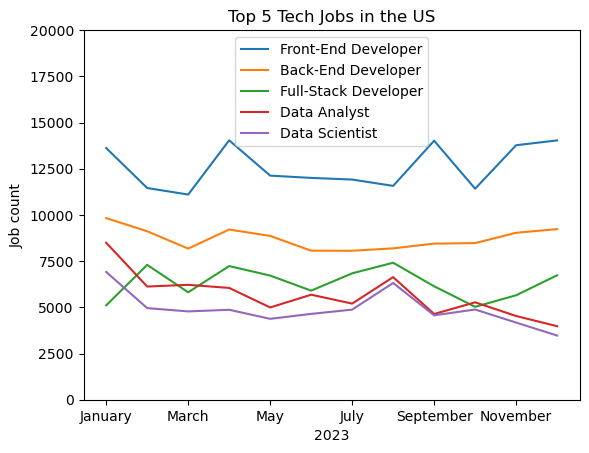

In [8]:
df_us_merged[top_5].plot(kind='line')
plt.title('Top 5 Tech Jobs in the US')
plt.ylabel('Job count')
plt.xlabel('2023')
plt.ylim(0, 20000)
plt.legend()
plt.show()

In [ ]:
## Summary

This regional analysis for the USA demonstrates:
- **Top job roles**: Identifies the most in-demand positions in the US market
- **Market composition**: Shows the mix of data roles available
- **Volume insights**: Relative hiring activity by role

These insights support both job seekers seeking the most opportunities and recruiters understanding market competition.